# Creative Level Models - KPI Lift: Random Forest

This notebook is to build a creative level predictive model for awareness, consideration and intent rates, using the creative elements as predictors.

In [1]:
import numpy as np, pandas as pd, os, matplotlib.pyplot as plt
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 1000)
%matplotlib inline

In [2]:
df_raw = pd.read_csv(r"G:\My Drive\Creative_Meta_Analysis\Wave_2\SUMMARY_4.csv")

In [3]:
df_raw['aware_lift'] = df_raw['aware'] - df_raw['aware_base']
df_raw['cons_lift'] = df_raw['cons'] - df_raw['cons_base']
df_raw['purch_lift'] = df_raw['purch'] - df_raw['purch_base']

## Data Prep

In [3]:
df_raw.head()

,SID,Creative_Name,aware,cons,purch,enjoy,brand,rel,b_appeal,aware_base,cons_base,purch_base,gender,north_america,emea,apac,mobile,desktop,s06,s15,s30,age_30,age_45,p_low,p_high,pro_nexus,pro_android_os,pro_chromebook,pro_chromecast_aud,pro_chromecast,pro_google_play,pro_youtube_red,pro_youtube_music,pro_google_user,pro_google_photos,pro_g_suite,pro_pixel,pro_daydream,pro_android_pay,pro_google_home,pro_gsa,pro_google_assist,pro_youtube_tv,pro_android_wear,pro_fi,pro_youtube,pro_google_cloud,pro_google_express,pro_digital_skills,pro_feed,pro_google_home_mini,pro_duo,pro_ellen,pro_pixelbook,pro_google_duo,pro_pixel_2,pro_watercooler,pro_google_home_max,Real_World,Story_Driven,Event,Google_Logo_Upfront_Recode,Product_Logo_Upfront_Recode,Audio_Mention_Upfront_Recode,No_of_Visuals_Recode,Google_Logo_50,Product_Logo_50,Product_Shot_50,Text_on_End_Card,Demo,Front_Card,End_Card,Pop_Culture,Visually_Text_Only,Music,Voiceover,No_Product_Msgs_Recode
0,266344,Nexus5AvailableNow15sec=266344B (Test),0.478548,0.283828,0.369637,0.495050,0.693069,0.749175,0.577558,0.310000,0.18,0.36,0.287129,1,0,0,0,1,0,1,0,0.679868,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,Zero,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Zero
1,266344,Nexus5XAvailableNow30sec=266344A (Test),0.544262,0.295082,0.432787,0.619672,0.780328,0.868852,0.704918,0.310000,0.18,0.36,0.268852,1,0,0,0,1,0,0,1,0.678689,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,One+,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Two+
2,266344,Nexus6PAvailableNow30Sec=266344C (Test),0.590164,0.347541,0.445902,0.577049,0.793443,0.862295,0.714754,0.310000,0.18,0.36,0.340984,1,0,0,0,1,0,0,1,0.681967,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,animated,no,no,Zero,1+,Zero,Zero,no,yes,yes,yes,yes,yes,yes,no,No,yes,no,Two+
3,268118,Android Disco 30sec,0.923333,NaN,NaN,0.676667,0.756667,0.870000,0.676667,0.906667,NaN,NaN,0.326667,1,0,0,0,1,0,0,1,0.663333,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,real world,no,no,1+,Zero,Zero,Zero,no,no,yes,yes,yes,yes,yes,no,No,yes,no,Two+
4,268118,Android Fog 30sec,0.920530,NaN,NaN,0.658940,0.751656,0.850993,0.639073,0.906667,NaN,NaN,0.284768,1,0,0,0,1,0,0,1,0.652318,0.0,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,real world,yes,no,1+,1+,Zero,Zero,no,no,yes,yes,yes,yes,yes,no,No,yes,yes,One


In [4]:
df_raw.shape

(434, 77)

In [5]:
df_raw.columns

Index(['SID', 'Creative_Name', 'aware', 'cons', 'purch', 'enjoy', 'brand',
       'rel', 'b_appeal', 'aware_base', 'cons_base', 'purch_base', 'gender',
       'north_america', 'emea', 'apac', 'mobile', 'desktop', 's06', 's15',
       's30', 'age_30', 'age_45', 'p_low', 'p_high', 'pro_nexus',
       'pro_android_os', 'pro_chromebook', 'pro_chromecast_aud',
       'pro_chromecast', 'pro_google_play', 'pro_youtube_red',
       'pro_youtube_music', 'pro_google_user', 'pro_google_photos',
       'pro_g_suite', 'pro_pixel', 'pro_daydream', 'pro_android_pay',
       'pro_google_home', 'pro_gsa', 'pro_google_assist', 'pro_youtube_tv',
       'pro_android_wear', 'pro_fi', 'pro_youtube', 'pro_google_cloud',
       'pro_google_express', 'pro_digital_skills', 'pro_feed',
       'pro_google_home_mini', 'pro_duo', 'pro_ellen', 'pro_pixelbook',
       'pro_google_duo', 'pro_pixel_2', 'pro_watercooler',
       'pro_google_home_max', 'Real_World', 'Story_Driven', 'Event',
       'Google_Logo_Upfront_Re

In [7]:
df = df_raw[[
    'aware_lift', 
    'cons_lift', 
    'purch_lift', 
    
    'north_america', 
    'emea', 
    'apac', 
    'mobile', 
    'desktop', 
    's06',
    's15', 
    's30',
    'pro_nexus', 
    'pro_android_os',   
    'pro_chromebook', 
    'pro_chromecast_aud', 
    'pro_chromecast',
    'pro_google_play', 
    'pro_youtube_red', 
    'pro_youtube_music',
    'pro_google_user', 
    'pro_google_photos', 
    'pro_g_suite', 
    'pro_pixel',
    'pro_daydream', 
    'pro_android_pay', 
    'pro_google_home', 
    'pro_gsa',
    'pro_google_assist', 
    'pro_youtube_tv', 
    'pro_android_wear', 
    'pro_fi',
    'pro_youtube', 
    'pro_google_cloud', 
    'pro_google_express',
    'pro_digital_skills', 
    'pro_feed',
    'pro_google_home_mini', 
    'pro_duo',
    'pro_ellen', 
    'pro_pixelbook', 
    'pro_google_duo', 
    'pro_pixel_2',
    'pro_watercooler', 
    'pro_google_home_max', 
    
    'Real_World', 
    'Story_Driven',
    'Event', 
    'Google_Logo_Upfront_Recode', 
    'Product_Logo_Upfront_Recode',
    'Audio_Mention_Upfront_Recode', 
    'No_of_Visuals_Recode',
    'Google_Logo_50', 
    'Product_Logo_50', 
    'Product_Shot_50',
    'Text_on_End_Card', 
    'Demo', 
    'Front_Card', 
    'Pop_Culture',
    'Music', 
    'Voiceover', 
    'No_Product_Msgs_Recode'
]]

In [8]:
df = pd.get_dummies(df, columns = [
    'Real_World', 
    'Story_Driven',
    'Event', 
    'Google_Logo_Upfront_Recode', 
    'Product_Logo_Upfront_Recode',
    'Audio_Mention_Upfront_Recode', 
    'No_of_Visuals_Recode',
    'Google_Logo_50', 
    'Product_Logo_50', 
    'Product_Shot_50',
    'Text_on_End_Card', 
    'Demo', 
    'Front_Card', 
    'Pop_Culture',
    'Music', 
    'Voiceover', 
    'No_Product_Msgs_Recode'
])

## Model KPI Lifts

### Awareness

In [9]:
df_aware = df.drop(axis=1, columns=['cons_lift', 'purch_lift']).dropna()
X = df_aware.drop(axis=1, columns=['aware_lift'])
y_aware = df_aware['aware_lift']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_aware, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = [{
    'n_estimators': [22, 23, 24],
    'max_depth': [20, 25, 30],
    'max_features': ['auto'] 
}]

rf_aware = RandomForestRegressor(random_state=42)
rf_grid_aware = GridSearchCV(rf_aware, params)
rf_grid_aware.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [22, 23, 24], 'max_depth': [20, 25, 30], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [12]:
pd.DataFrame(rf_grid_aware.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.039094,0.002020,0.622420,0.906242,20,auto,22,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",2,0.683806,0.912563,0.554346,0.912267,0.628544,0.893897,0.000034,8.229560e-04,0.053068,0.008730
1,0.039773,0.001670,0.620505,0.907018,20,auto,23,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",7,0.681796,0.914021,0.553087,0.911509,0.626070,0.895525,0.001679,4.717101e-04,0.052731,0.008191
2,0.043126,0.001661,0.617122,0.906446,20,auto,24,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",9,0.678221,0.914272,0.551750,0.910442,0.620836,0.894622,0.004343,4.650426e-04,0.051737,0.008505
3,0.038090,0.001672,0.623092,0.909095,25,auto,22,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",1,0.682852,0.915820,0.570188,0.914404,0.615688,0.897062,0.001663,4.732253e-04,0.046325,0.008529
4,0.044788,0.002350,0.622220,0.909731,25,auto,23,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",3,0.683851,0.917563,0.567754,0.913378,0.614489,0.898251,0.005260,4.664642e-04,0.047745,0.008295
5,0.042100,0.001337,0.620628,0.909164,25,auto,24,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",6,0.682339,0.917670,0.569426,0.912696,0.609553,0.897125,0.000849,4.744619e-04,0.046788,0.008752
6,0.038770,0.001688,0.622177,0.909718,30,auto,22,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",4,0.684611,0.916081,0.572442,0.914193,0.608905,0.898881,0.001219,4.825071e-04,0.046774,0.007702
7,0.039771,0.002007,0.621535,0.910161,30,auto,23,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",5,0.686199,0.917352,0.569814,0.913163,0.607997,0.899969,0.001281,9.798072e-07,0.048499,0.007407
8,0.044774,0.002005,0.619937,0.909637,30,auto,24,"{'max_depth': 30, 'max_features': 'auto', 'n_e...",8,0.684555,0.917478,0.571304,0.912486,0.603358,0.898946,0.002495,1.123916e-07,0.047725,0.007829


In [13]:
rf_aware = rf_grid_aware.best_estimator_

In [14]:
from sklearn.metrics import mean_squared_error

rmse_aware = mean_squared_error(y_test, rf_aware.predict(X_test))**0.5
rmse_aware

0.041865610418472685

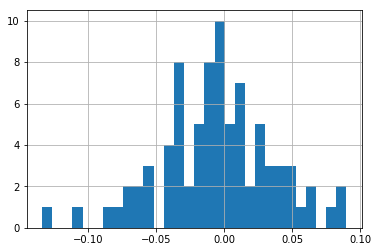

In [15]:
residuals = y_test-rf_aware.predict(X_test)
pd.Series(residuals).hist(bins=30)

### Consideration

In [16]:
df_cons = df.drop(axis=1, columns=['aware_lift', 'purch_lift']).dropna()
X = df_cons.drop(axis=1, columns=['cons_lift'])
y_cons = df_cons['cons_lift']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cons, test_size=0.2, random_state=42)

In [18]:
params = [{
    'n_estimators': [40, 45, 50],
    'max_depth': [15, 25, 35],
    'max_features': ['auto'] 
}]

rf_cons = RandomForestRegressor(random_state=42)
rf_grid_cons = GridSearchCV(rf_cons, params)
rf_grid_cons.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [40, 45, 50], 'max_depth': [15, 25, 35], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [19]:
pd.DataFrame(rf_grid_cons.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.055348,0.002651,0.359974,0.867289,15,auto,40,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",3,0.302581,0.881772,0.415782,0.839686,0.361581,0.880409,0.009208,4.566066e-04,0.046326,0.019526
1,0.053143,0.002340,0.356401,0.869540,15,auto,45,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",9,0.294868,0.883238,0.401835,0.843204,0.372708,0.882179,0.000804,4.724946e-04,0.045236,0.018628
2,0.059801,0.002686,0.356976,0.871335,15,auto,50,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",8,0.292492,0.886413,0.399289,0.845120,0.379432,0.882472,0.001234,4.816251e-04,0.046453,0.018607
3,0.051460,0.002006,0.363212,0.867548,25,auto,40,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",1,0.308033,0.881572,0.420172,0.840937,0.361406,0.880134,0.003318,2.404156e-05,0.045895,0.018826
4,0.053130,0.002674,0.358635,0.869696,25,auto,45,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",6,0.300599,0.883053,0.405323,0.844162,0.370128,0.881874,0.001446,4.727753e-04,0.043598,0.018062
5,0.060838,0.002338,0.358994,0.871484,25,auto,50,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",4,0.297320,0.886267,0.403191,0.845890,0.376696,0.882293,0.001228,4.711456e-04,0.045063,0.018170
6,0.053808,0.002005,0.363212,0.867548,35,auto,40,"{'max_depth': 35, 'max_features': 'auto', 'n_e...",1,0.308033,0.881572,0.420172,0.840937,0.361406,0.880134,0.004490,4.052337e-07,0.045895,0.018826
7,0.054468,0.002016,0.358635,0.869696,35,auto,45,"{'max_depth': 35, 'max_features': 'auto', 'n_e...",6,0.300599,0.883053,0.405323,0.844162,0.370128,0.881874,0.000916,1.500459e-05,0.043598,0.018062
8,0.060817,0.002341,0.358994,0.871484,35,auto,50,"{'max_depth': 35, 'max_features': 'auto', 'n_e...",4,0.297320,0.886267,0.403191,0.845890,0.376696,0.882293,0.001691,4.740116e-04,0.045063,0.018170


In [20]:
rf_cons = rf_grid_cons.best_estimator_

In [21]:
rmse_cons = mean_squared_error(y_test, rf_cons.predict(X_test))**0.5
rmse_cons

0.046799892193702286

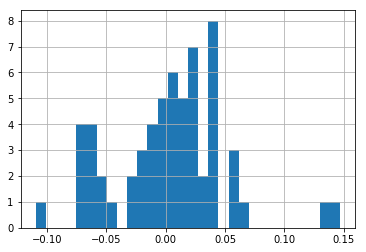

In [22]:
residuals = y_test-rf_cons.predict(X_test)
pd.Series(residuals).hist(bins=30)

### Purchase

In [23]:
df_purch = df.drop(axis=1, columns=['aware_lift', 'cons_lift']).dropna()
X = df_purch.drop(axis=1, columns=['purch_lift'])
y_purch = df_purch['purch_lift']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_purch, test_size=0.2, random_state=42)

In [25]:
params = [{
    'n_estimators': [225, 250, 275],
    'max_depth': [20, 25],
    'max_features': ['auto'] 
}]

rf_purch = RandomForestRegressor(random_state=42)
rf_grid_purch = GridSearchCV(rf_purch, params)
rf_grid_purch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [225, 250, 275], 'max_depth': [20, 25], 'max_features': ['auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [26]:
pd.DataFrame(rf_grid_purch.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_max_features,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.305771,0.010037,0.145833,0.800177,20,auto,225,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",1,0.284754,0.784969,0.095250,0.804777,0.056513,0.810785,0.015303,0.000015,0.099762,0.011030
1,0.332575,0.012676,0.145558,0.800960,20,auto,250,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",2,0.281910,0.786103,0.099590,0.805692,0.054170,0.811086,0.004717,0.002380,0.098440,0.010734
2,0.374350,0.012021,0.144983,0.800635,20,auto,275,"{'max_depth': 20, 'max_features': 'auto', 'n_e...",4,0.283093,0.785333,0.099482,0.805509,0.051345,0.811064,0.003884,0.000015,0.099877,0.011056
3,0.300821,0.009683,0.145114,0.800078,25,auto,225,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",3,0.285416,0.784891,0.097642,0.804625,0.051252,0.810718,0.008854,0.000467,0.101266,0.011023
4,0.337220,0.011039,0.144802,0.800839,25,auto,250,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",5,0.282568,0.786055,0.101462,0.805516,0.049327,0.810944,0.012758,0.000012,0.099972,0.010686
5,0.359958,0.011697,0.144267,0.800541,25,auto,275,"{'max_depth': 25, 'max_features': 'auto', 'n_e...",6,0.283764,0.785293,0.101023,0.805370,0.046944,0.810960,0.009948,0.000473,0.101341,0.011021


In [27]:
rf_purch = rf_grid_purch.best_estimator_

In [28]:
rmse_purch = mean_squared_error(y_test, rf_purch.predict(X_test))**0.5
rmse_purch

0.04080761818649247

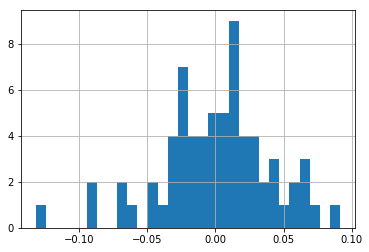

In [29]:
residuals = y_test-rf_purch.predict(X_test)
pd.Series(residuals).hist(bins=30)

### Save Models

In [30]:
from sklearn.externals import joblib

joblib.dump(rf_aware, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_aware_creative_lift.pkl') 
joblib.dump(rf_cons, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_cons_creative_lift.pkl') 
joblib.dump(rf_purch, r'C:\Users\william.raikes\Programming\Python\Creative_Elements_App\model_building\pickled_models\rf_purch_creative_lift.pkl') 

['C:\\Users\\william.raikes\\Programming\\Python\\Creative_Elements_App\\model_building\\pickled_models\\rf_purch_creative_lift.pkl']

### Test Prediction 

See how well it does with real scenarios, not just metric scores.

In [27]:
rf_aware.predict(df.iloc[100, 3:]), rf_cons.predict(df.iloc[100, 3:]), rf_purch.predict(df.iloc[100, 3:])

c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\users\william.raikes\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.resh

(array([0.70469562]), array([0.2635927]), array([0.28786065]))